# Stock Price Time Series Prediction Analysis

Given a stream of stock quotes, Is there a way to moderately predict the level change that is likely to occur. Such as when the Fed speaks.

Pull Imports

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

2023-05-24 14:41:09.985763: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-24 14:41:09.987495: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 14:41:10.019830: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 14:41:10.020442: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 14:41:10.747046: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Gather datasets

In [2]:
#
csv_path = 'data/Sample1.fpsh'
df = pd.read_csv(csv_path)
# Slice [start:stop:step], starting from index 5 take every 6th record.
# we aren't going to slice, but use all of the samples.
#df = df[5::6]
date_time = pd.to_datetime(df.pop('TimestampUtc'), format='%Y-%m-%dT%H:%M:%S.%fZ')

Review File Format

In [3]:
df.head()

,Symbol,BidPrice,BidSize,AskPrice,AskSize
0,TQQQ,28.06,6,28.07,1
1,TQQQ,28.06,8,28.07,1
2,TQQQ,28.06,6,28.07,1
3,TQQQ,28.06,8,28.07,1
4,TQQQ,28.06,8,28.08,6


Plot the data over time

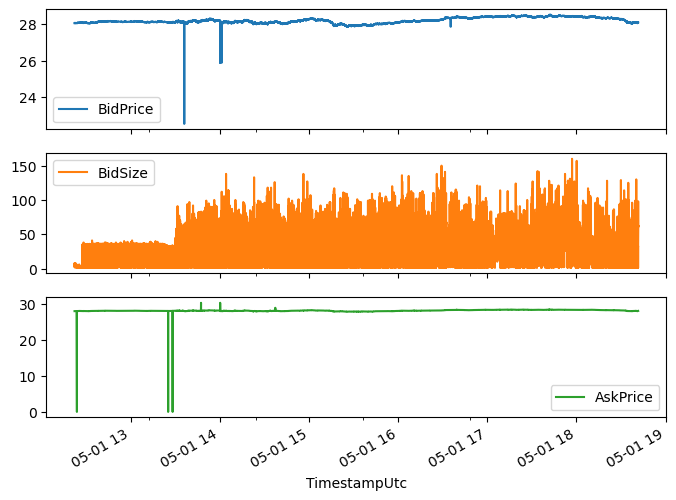

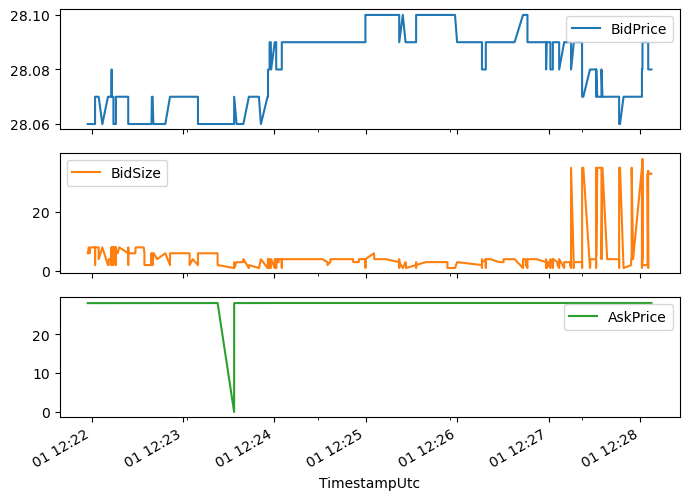

In [4]:
plot_cols = ['BidPrice', 'BidSize', 'AskPrice']
plot_features = df[plot_cols]

plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

### Inspect and cleanup

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BidPrice,435750.0,28.181948,0.154356,22.51,28.08,28.16,28.29,28.52
BidSize,435750.0,40.366472,18.256069,1.00,31.00,35.00,55.00,160.00
AskPrice,435750.0,28.195469,0.190225,0.00,28.09,28.17,28.31,30.39
AskSize,435750.0,42.769916,20.482712,0.00,32.00,37.00,57.00,177.00


In [12]:
bidPrice = df['BidPrice']
bad_bidPrice = bidPrice <= 27.85
df = df.drop(df[df.BidPrice <= 27.85].index)


askPrice = df['AskPrice']
bad_askPrice = askPrice >= 28.60
df = df.drop(df[df.AskPrice >= 28.60].index)
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
BidPrice,435584.0,28.182461,0.150458,27.86,28.08,28.16,28.29,28.52
BidSize,435584.0,40.378673,18.247505,1.00,31.00,35.00,55.00,160.00
AskPrice,435584.0,28.195098,0.188032,0.00,28.09,28.17,28.31,28.54
AskSize,435584.0,42.780157,20.474109,0.00,32.00,37.00,57.00,177.00


In [ ]:
plt.hist2d(df['BidPrice'], df['BidSize'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('BidPrice')
plt.ylabel('BidSize')